In [1]:
# import library

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

#import warnings ignore

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data file

df = pd.read_csv('marketing_AB.csv')
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [3]:
# general info dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


## 1. Data Cleaning

Dataset marketing_AB.csv terdiri dari 588101 baris dan 7 kolom. Sebelum masuk pada tahap pengolahan data, akan dilakukan pembersihan dataset terlebih dahulu. Pembersihan dataset yang akan dilakukan meliputi missing value data, duplicates data, dan inconsistent data.

### 1.1. Missing value checking

In [4]:
# missing value check

df.isna().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

Tidak terdapat missing value pada dataset.

### 1.2. Duplicates data checking

In [5]:
# duplicates check

df[df.duplicated(keep = False)]

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour


In [6]:
# re-check duplicates

df.duplicated().sum()

0

Tidak terdapat duplikat data pada dataset.

### 1.3. Inconsistent data checking

In [7]:
# unique value check pada pada colomn dengan tipe data object

pd.concat([df['test group'], df['converted'], df['most ads day']]).unique()

array(['ad', 'psa', False, True, 'Monday', 'Tuesday', 'Friday',
       'Saturday', 'Wednesday', 'Sunday', 'Thursday'], dtype=object)

Tidak terdapat inconsistent data pada dataset.

### 1.4. Cleaned data

In [8]:
# cleaned dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


Setelah dilakukan pembersihan, dataset telah siap untuk diolah. Cleaned data terdiri dari 588101 baris dan 7 kolom.

## 2. Exploratory Data Analysis

### 2.1. Dataset overview

In [9]:
# dataset overview

df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [10]:
# kolom pada dataset

df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

Terdapat 7 kolom pada dataset:
1. __Unnamed: 0__ : index data
2. __user id__ : nomor pengguna
3. __test group__ : kelompok varian
    - psa : control
    - ad : treatment
4. __converted__ : membeli / tidak membeli
    - True : membeli
    - False : tidak membeli
5. __total ads__ : jumlah total advertisement
6. __most ads day__ : hari di mana ads paling sering dilihat
7. __most ads hour__ : jam di mana ads paling sering dilihat

### 2.2. Conversion data masing-masing group

In [11]:
# data pada group control
data_control = df[df['test group'] == 'psa']

# banyak user pada group control
n_control = data_control.shape[0]
print(f'Banyak user pada group control adalah {n_control}')

# banyak user yang convert pada group control
n_conv_ctr = data_control.converted.sum()
print(f'Banyak user yang convert pada group control adalah {n_conv_ctr}')

# conversion rate group control
conv_ctr = data_control.converted.mean() * 100
print(f'Conversion rate group control adalah {conv_ctr:.2f}%')

Banyak user pada group control adalah 23524
Banyak user yang convert pada group control adalah 420
Conversion rate group control adalah 1.79%


In [12]:
# data pada group treatment
data_treatment = df[df['test group'] == 'ad']

# banyak user pada group treatment
n_treatment = data_treatment.shape[0]
print(f'Banyak user pada group treatment adalah {n_treatment}')

# banyak user yang convert pada group treatment
n_conv_trt = data_treatment.converted.sum()
print(f'Banyak user yang convert pada group treatment adalah {n_conv_trt}')

# conversion rate group treatment
conv_trt = data_treatment.converted.mean() * 100
print(f'Conversion rate group treatment adalah {conv_trt:.2f}%')

Banyak user pada group treatment adalah 564577
Banyak user yang convert pada group treatment adalah 14423
Conversion rate group treatment adalah 2.55%


In [13]:
df.groupby('test group').agg({'converted':'count'}).reset_index()

,test group,converted
0,ad,564577
1,psa,23524


In [14]:
df.groupby('test group').agg({'converted':'mean'}).reset_index()

,test group,converted
0,ad,0.025547
1,psa,0.017854


|Group|#User|Conversion Rate
|:--|:--:|:--:|
|Control|23524|0.0179|
|Treatment|564577|0.0255|

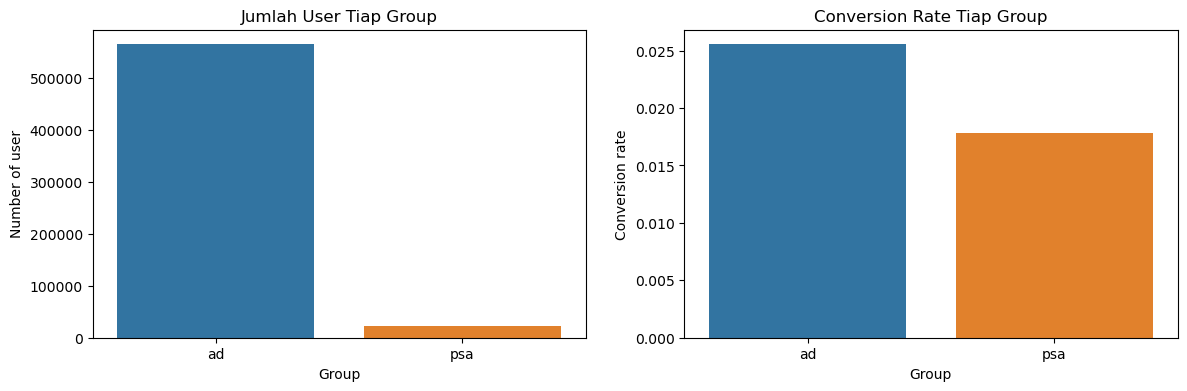

In [15]:
# visualisasi jumlah user & conversion rate

# membuat subplot 1 x 2
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (14, 4))

# membuat plot
sns.barplot(data = df.groupby('test group').agg({'converted':'count'}).reset_index(), x = 'test group', y = 'converted', ax = ax[0])
sns.barplot(data = df.groupby('test group').agg({'converted':'mean'}).reset_index(), x = 'test group', y = 'converted', ax = ax[1])

# membuat title
ax[0].set_title('Jumlah User Tiap Group')
ax[1].set_title('Conversion Rate Tiap Group')

# membuat nama label x
ax[0].set_xlabel('Group')
ax[1].set_xlabel('Group')

# membuat nama label y
ax[0].set_ylabel('Number of user')
ax[1].set_ylabel('Conversion rate')

## menampilkan plot
plt.show()

### 2.3. Standar deviasi 'converted'

In [16]:
# standar deviasi

std_dev = df.converted.std()
print(f'Standar deviasi populasi adalah {std_dev:.4f}')

Standar deviasi populasi adalah 0.1568


## 3. A/B Testing

### 3.1. Sample size

In [17]:
# significant level
alpha = 0.05

# power level (1 - beta)
beta = 0.2

# difference
delta = 0.01

# standar deviasi
std_dev = df.converted.std()

In [18]:
# calculate z value
z_alpha = stats.norm.ppf(1 - alpha/2)
z_beta = stats.norm.ppf(1 - beta)

z_alpha, z_beta

(1.959963984540054, 0.8416212335729143)

In [19]:
import math

# calculate sample size
n_sample = 2 * (std_dev ** 2) * ((z_alpha + z_beta) ** 2) / (delta ** 2)

print(f"Minimum sample yang dibutuhkan tiap group adalah: {math.ceil(n_sample)}")

Minimum sample yang dibutuhkan tiap group adalah: 3862


In [20]:
# randomization sample eksperimen
sample_size = 3862

# randomization group kontrol
control_group = data_control.sample(sample_size, random_state = 97)

# randomization group treatment
treatment_group = data_treatment.sample(sample_size, random_state = 97)

# menggabungkan group control & treatment menjadi satu dataset eksperimen
df_exp = pd.concat([control_group, treatment_group])
df_exp.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
29212,29212,922089,psa,False,54,Wednesday,13
550601,550601,914594,psa,False,2,Tuesday,11
585302,585302,913531,psa,False,2,Tuesday,10
85631,85631,905163,psa,False,2,Monday,11
156546,156546,913880,psa,False,33,Sunday,16


### 3.2. Uji Hipotesis

In [21]:
# banyak user group control pada data eksperimen
n_ctr_exp = control_group.shape[0]
print(f'Banyak user group control pada data eksperimen adalah {n_ctr_exp}')

# banyak user group control yang convert pada data eksperimen
n_conv_ctr_exp = control_group.converted.sum()
print(f'Banyak user group control yang convert pada data eksperimen adalah {n_conv_ctr_exp}')

# conversion rate group control pada data eksperimen
conv_ctr_exp = control_group.converted.mean() * 100
print(f'Conversion rate group control pada data eksperimen adalah {conv_ctr_exp:.2f}%')

Banyak user group control pada data eksperimen adalah 3862
Banyak user group control yang convert pada data eksperimen adalah 63
Conversion rate group control pada data eksperimen adalah 1.63%


In [22]:
# banyak user group treatment pada data eksperimen
n_trt_exp = treatment_group.shape[0]
print(f'Banyak user group treatment pada data eksperimen adalah {n_trt_exp}')

# banyak user group treatment yang convert pada data eksperimen
n_conv_trt_exp = treatment_group.converted.sum()
print(f'Banyak user group treatment yang convert pada data eksperimen adalah {n_conv_trt_exp}')

# conversion rate group treatment pada data eksperimen
conv_trt_exp = treatment_group.converted.mean() * 100
print(f'Conversion rate group treatment pada data eksperimen adalah {conv_trt_exp:.2f}%')

Banyak user group treatment pada data eksperimen adalah 3862
Banyak user group treatment yang convert pada data eksperimen adalah 89
Conversion rate group treatment pada data eksperimen adalah 2.30%


|Experiment|#User|Conversion Rate
|:--|:--:|:--:|
|Control|3862|0.0163|
|Treatment|3862|0.0230|

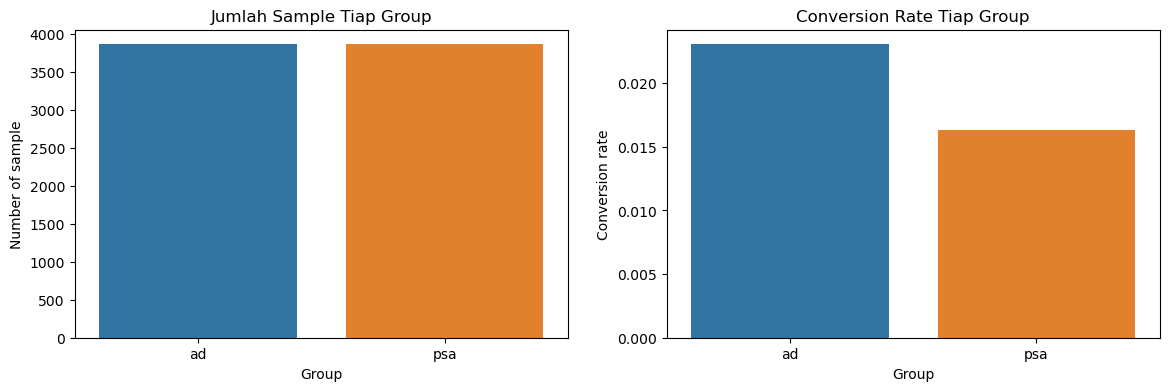

In [23]:
# visualisasi jumlah user & conversion rate

# membuat subplot 1 x 2
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (14, 4))

# membuat plot
sns.barplot(data = df_exp.groupby('test group').agg({'converted':'count'}).reset_index(), x = 'test group', y = 'converted', ax = ax[0])
sns.barplot(data = df_exp.groupby('test group').agg({'converted':'mean'}).reset_index(), x = 'test group', y = 'converted', ax = ax[1])

# membuat title
ax[0].set_title('Jumlah Sample Tiap Group')
ax[1].set_title('Conversion Rate Tiap Group')

# membuat nama label x
ax[0].set_xlabel('Group')
ax[1].set_xlabel('Group')

# membuat nama label y
ax[0].set_ylabel('Number of sample')
ax[1].set_ylabel('Conversion rate')

## menampilkan plot
plt.show()

Dari bar chart di atas, dapat dilihat bahwa conversion rate group treatment (**2.30%**) lebih tinggi dari conversion rate group control (**1.63%**).

#### 1. Mendefinisikan Hipotesis

- Membuktikan bahwa **conversion rate group treatment** (dengan melihat ads) adalah **lebih tinggi**  dari **conversion rate group control** (dengan melihat PSA).
- misal,
  - $p_1$ adalah conversion rate **ads (treatment)** 
  - $p_2$ adalah conversion rate **PSA (control)**
- maka,
  - $H_0$ : $p_1$ $\leq$ $p_2$
  - $H_1$ : $p_1$ $>$ $p_2$

#### 2. Statistik uji

Karena ingin membuktikan proporsi mana yang lebih besar antara PSA & ads, maka uji statistik yang digunakan adalah z-test pada 2 sampel. Sampel 1 adalah user dengan ads (group treatment), dan sampel 2 adalah user dengan PSA (group control).

#### 3. Aturan keputusan

Dalam membuat keputusan uji statistik, kita dapat menggunakan :
- Perbandingan z-statistics dengan critical value
    - One-tailed (right), $z > z_{\alpha}$  → tolak $H_0$

- Perbandingan p-value dengan alpha
  - p-value < $\alpha$ → tolak $H_0$

#### 4. Hitung statistik uji

In [24]:
# total convert
count_convert = [n_conv_trt_exp, n_conv_ctr_exp] 

# total observasi
count_observation = [n_trt_exp, n_ctr_exp]

# uji pihak kanan '>'
alternative_option = 'larger'

In [25]:
# import library
from statsmodels.stats.proportion import proportions_ztest

# panggil fungsi
z_stat, p_value = proportions_ztest(count = count_convert,
                                       nobs = count_observation,
                                       alternative = alternative_option)

print(f"Z stats : {z_stat:.4f}")
print(f"P-value : {p_value:.4f}")

Z stats : 2.1299
P-value : 0.0166


In [26]:
from scipy import stats

# Z critical value
alpha = 0.05
z_crit = stats.norm.ppf(1 - alpha)

print(f"Z critical : {z_crit:.4f}")

Z critical : 1.6449


#### 5. Pengambilan keputusan

In [27]:
# pengambilan keputusan dari perbandingan z-stats dan z-crit

if z_stat > z_crit:
    print("Decision : Reject H0")
else:
    print("Decision : Fail to Reject H0")

Decision : Reject H0


In [28]:
# pengambilan keputusan dari perbandingan P-Value dan alpha.

if p_value<0.05:
    print("Decision : Reject H0")
else:
    print("Decision : Fail to reject H0")

Decision : Reject H0


Dari perhitungan Z-stats maupun P-value, diambil keputusan untuk tolak H0. Maka, dengan tingkat keyakinan 95%, terdapat cukup bukti bahwa **conversion rate group treatment** (dengan melihat ads) **lebih tinggi** dibandingkan **conversion rate group control** (dengan melihat PSA).

## 3.3. SRM dengan Chi-square Test

In [29]:
# total user
n_total = control_group.shape[0] + treatment_group.shape[0]

# percentage in each group
persen_ctr = control_group.shape[0] / n_total * 100
persen_trt = treatment_group.shape[0] / n_total * 100

print(f"% control   : {persen_ctr:.2f}%")
print(f"% treatment : {persen_trt:.2f}%")

% control   : 50.00%
% treatment : 50.00%


|Experiment|#User|Percentage
|:--|:--:|:--:|
|Control|3862|50%|
|Treatment|3862|50%|

Dari data di atas, terlihat bahwa tidak terdapat sampling ratio mismatch pada data eksperimen. Untuk membuktikan bahwa tidak terdapat SRM issue, maka akan dilakukan chi-square test.

#### 1. Mendefinisikan hipotesis ($H_0$ dan $H_1$)

$H_0$  : No SRM detected

$H_1$  : SRM detected

#### 2. Statistik uji (chi-square statistics)

$$ \chi^2 = \sum \frac{\left ( \text{observed - expected} \right )^2}{\text{expected}} $$

Where :
- Observed: the control and variation traffic volumes (sample size), respectively
- Expected: the expected values for control and treatment — i.e. the total observed divided by 2


In [30]:
# expected number of user in each group

n_exp = n_total / 2
n_exp

3862.0

|Group|Observed|Expected
|:--|:--:|:--:|
|Control|3862|3862|
|Treatment|3862|3862|

In [31]:
observed = [ n_ctr_exp, n_trt_exp ]
expected = [ n_exp, n_exp ]

In [32]:
# import chi-square
from scipy.stats import chisquare

# calculate chi-square statistics
chi = chisquare(observed, f_exp = expected)
print(chi)

Power_divergenceResult(statistic=0.0, pvalue=1.0)


#### 3. Aturan keputusan

Dalam membuat keputusan uji statistik, kita dapat menggunakan :
- Perbandingan chi-square statistics dengan critical value
    -  $\chi^2 > \chi^2_{\alpha,dof}$ → tolak $H_0$

- Perbandingan p-value dengan alpha
  - p-value < $\alpha$ → tolak $H_0$

#### 4. Hitung statistik uji

Normally, one would look for a p-value of 0.05 or less to proof of SRM. The problem with 0.05 is that it’s not strict enough for our purposes. Using this might give us a false signal. What we need is to be stricter for our test. So we use significance level 1%.

degree of freedom (dof) is calculated as: 
$$ dof = (rows − 1) × (columns − 1) $$

In [33]:
# critical value is the chi-square value at alpha
alpha = 0.01
dof = (2 - 1) * (2 - 1)  

import scipy

chi_critical = scipy.stats.chi2.ppf(1 - alpha, dof)
print(f"Critical value: {chi_critical:.3f}")

Critical value: 6.635


#### 5. Pengambilan keputusan

In [34]:
# pengambilan keputusan dari perbandingan chi-square stats dan chi-square critical

if chi[0] > chi_critical:
    print("Reject H0 : SRM may be present.")
else:
    print("Fail to reject H0 : No SRM")

Fail to reject H0 : No SRM


In [35]:
# pengambilan keputusan dari perbandingan P-Value dan alpha.

if chi[1] < 0.01:
    print('Reject H0 : SRM may be present.')
else:
    print('Fail to reject H0 : No SRM.')

Fail to reject H0 : No SRM.


Dari perhitungan Chi-square statistics dan P-value, memberi keyakinan bahwa dalam data eksperimen **tidak terdapat SRM**.